In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
from tqdm import tqdm
import cv2

import tensorflow as tf
from tensorflow.keras import layers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

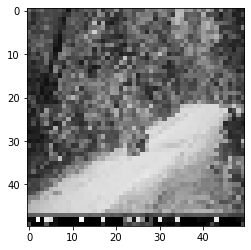

In [2]:
data = np.load("../Data/Data_Myanmar/training_data_myanmar.npy", allow_pickle=True)
plt.imshow(data[2][0], cmap="gray")
plt.show()

In [3]:
data[2]

array([array([[111,  69,  87, ...,  50,  29,  37],
       [ 78,  44,  62, ...,  30,  36,  72],
       [ 81,  50,  64, ...,  64,  32,  30],
       ...,
       [ 93,  93,  97, ...,  64,  65,  64],
       [ 12,  11, 250, ...,   0,  10,  27],
       [ 72,   0,   1, ...,   0,   0,  72]], dtype=uint8),
       array([0., 0., 0., 0., 0., 0., 1., 0.])], dtype=object)

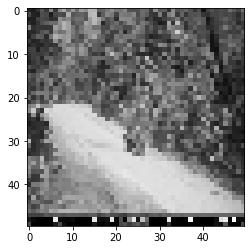

In [4]:
# pick an image to transform
test_img = data[2][0]
img = image.img_to_array(test_img)  # convert image to numpy arry
img = img.reshape((1,) + img.shape)  # reshape image

new_image = tf.image.flip_left_right(img)

plt.imshow(new_image[0], cmap="gray")
plt.show()

# Example

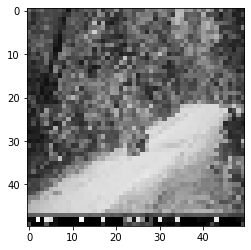

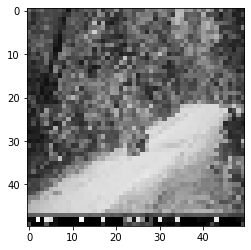

In [9]:
# creates a data generator object that transforms images
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
# zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest'
)

# pick an image to transform
test_img = data[2][0]
img = image.img_to_array(test_img)  # convert image to numpy arry
img = img.reshape((1,) + img.shape)  # reshape image

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):  # this loops runs forever until we break, saving images to current directory with specified prefix
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]), cmap="gray")
    i += 1
    if i > 1:  # show 4 images
        break

plt.show()